<a href="https://colab.research.google.com/github/Soccoll/Quarentena-Dados/blob/master/Quarentena_my_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("Felipe")

Felipe


In [0]:
import pandas as pd

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [6]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
avaliacoes_com_titulo = avaliacoes.join(filmes.set_index('filmeId'), on='filmeId').filter(["usuarioId", "filmeId", "nota", "titulo"])
avaliacoes_com_titulo.head()

,usuarioId,filmeId,nota,titulo
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [8]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [9]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.columns = ["filmeId", "titulo", "generos", "media"]
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [11]:
filmes_com_media.sort_values("media", ascending=False).head(15)

,filmeId,titulo,generos,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


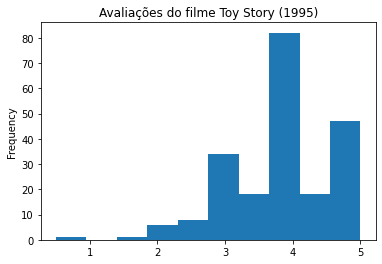

In [12]:
import matplotlib.pyplot as plt

filmeId = 1
nomeFilme = filmes.query(f'filmeId == {filmeId}')['titulo']
avaliacoes.query(f"filmeId == {filmeId}")["nota"].plot(kind="hist")
plt.title(f"Avaliações do filme {nomeFilme.item()}")
plt.show()

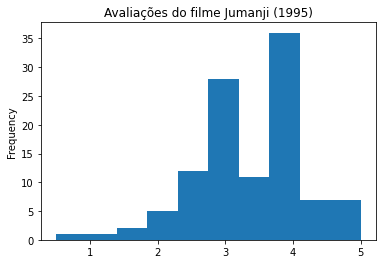

In [13]:
filmeId = 2
nomeFilme = filmes.query(f'filmeId == {filmeId}')['titulo']
avaliacoes.query(f"filmeId == {filmeId}")["nota"].plot(kind="hist")
plt.title(f"Avaliações do filme {nomeFilme.item()}")
plt.show()

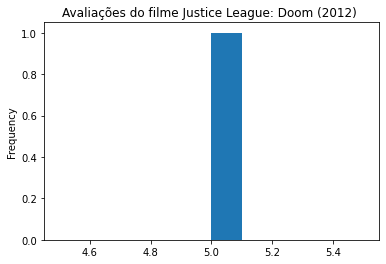

In [14]:
filmeId = 102084
nomeFilme = filmes.query(f'filmeId == {filmeId}')['titulo']
avaliacoes.query(f"filmeId == {filmeId}")["nota"].plot(kind="hist")
plt.title(f"Avaliações do filme {nomeFilme.item()}")
plt.show()

(Desafio 1) 


In [68]:
filmes_without_nota = filmes_com_media[filmes_com_media.media.isnull()]
filmes_without_nota['titulo']

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

(Desafio 2)

In [72]:
filmes_notamedia = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_notamedia.columns = ["Id", "title", "genre", "note"]
filmes_notamedia.head()

,Id,title,genre,note
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


(Desafio 3)


In [73]:
film_evaluation = avaliacoes.groupby('filmeId')['usuarioId'].count()
film_m = filmes_com_media.join(film_evaluation, on='filmeId')
film_m.columns = ["Id", "title", "genre", "media", "evaluation"]
film_m.filter(items=["Id", "title", "media", "evaluation"]).head()


,Id,title,media,evaluation
0,1,Toy Story (1995),3.920930,215.0
1,2,Jumanji (1995),3.431818,110.0
2,3,Grumpier Old Men (1995),3.259615,52.0
3,4,Waiting to Exhale (1995),2.357143,7.0
4,5,Father of the Bride Part II (1995),3.071429,49.0


(Desafio 4)

In [74]:
film_evaluation = film_m.filter(items=["Id", "title", "evaluation"]).join(film_m.media.round(2), on='Id')
film_evaluation.head()

,Id,title,evaluation,media
0,1,Toy Story (1995),215.0,3.43
1,2,Jumanji (1995),110.0,3.26
2,3,Grumpier Old Men (1995),52.0,2.36
3,4,Waiting to Exhale (1995),7.0,3.07
4,5,Father of the Bride Part II (1995),49.0,3.95


(Desafio 5)


In [85]:
genres = filmes['generos']
genres_sep = genres.str.split('|').explode()
genres_uni = genres_sep.unique()
genres_uni

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

(Desafio 6)

In [87]:
genre = genres_sep.value_counts()
genre

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: generos, dtype: int64

(Desafio 7)

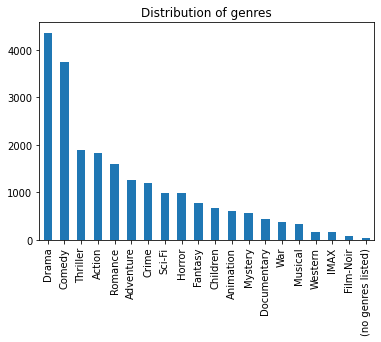

In [103]:
import matplotlib.pyplot as plt

generos_grouped_by_genero.plot(kind='bar')
plt.title("Distribution of genres")
plt.show()

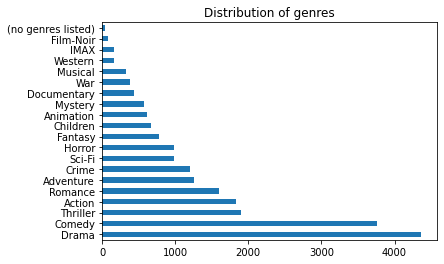

In [109]:
import matplotlib.pyplot as plt

generos_grouped_by_genero.plot(kind='barh')
plt.title("Distribution of genres")
plt.show()